# РУБЕЖНЫЙ КОНТРОЛЬ 1 Федосеев Д.А. ИУ5-22М
--------
## Вариант 4
---------
### Задание:
-----
Для заданного набора данных постройте основные графики, входящие в этап разведочного анализа данных. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Какие графики Вы построили и почему? Какие выводы о наборе данных Вы можете сделать на основании построенных графиков?

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

#Загрузка датасета
data = pd.read_csv('data/FIFA 2018 Statistics.csv', sep = ',')

data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


### Часть 1 - Анализ датасета, чистка датасета
--------

In [38]:
# Анализ размеров датасета:
print('Всего строк: {}'.format(data.shape[0]))
print('Всего столбцов: {}'.format(data.shape[1]))

# Выведем список пустых колонок
#data.dtypes
data.isnull().sum()

Всего строк: 128
Всего столбцов: 27


Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

In [39]:
# Удалим колонки с пропусками данных
data_red = data.dropna(axis = 1, how = 'any')
#Выведем размер получившегося датасета
data_red.shape

(128, 24)

### Часть 2 - Разведочный анализ полученного датасета
---------

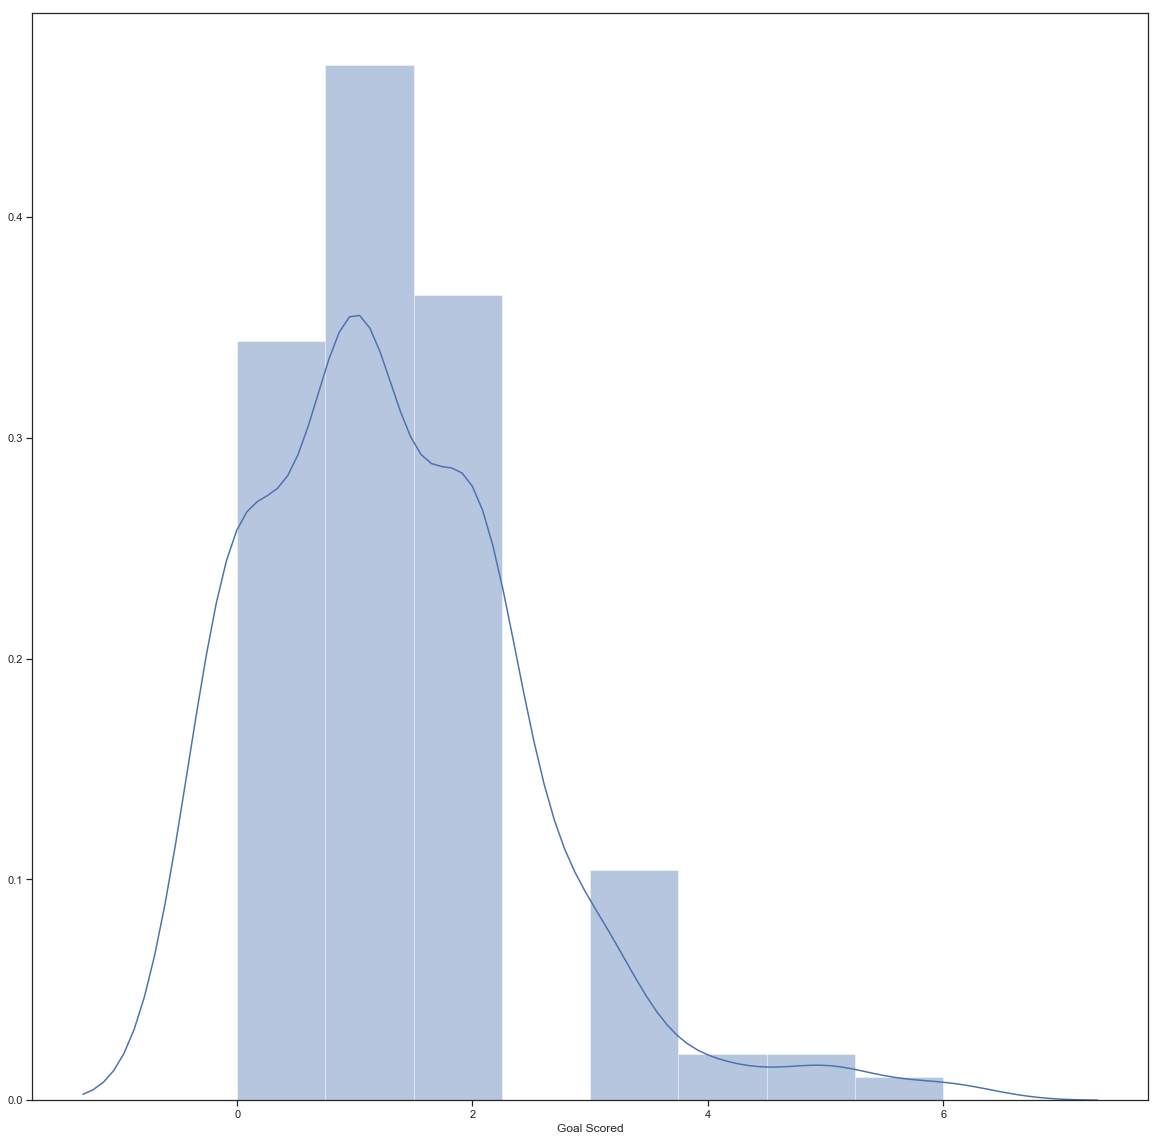

In [40]:
#Построим гистограмму с целью определить плотность вероятности распределения количества забитых голов
fig, ax = plt.subplots(figsize=(20,20)) 
sns.distplot(data_red['Goal Scored'])

#### Вывод из гистограммы
-----
В основном, команды забивали 1-2 гола за матч

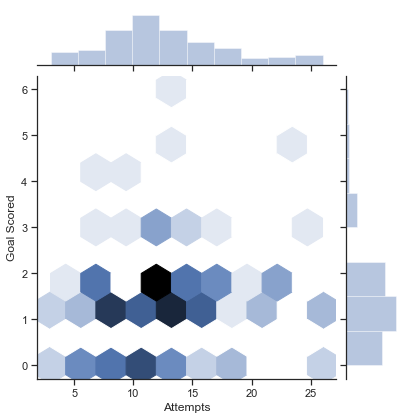

In [41]:
sns.jointplot(x='Attempts', y='Goal Scored', data=data_red,  kind="hex")

#### Вывод из гистограммы
-----
В основном, команды делали примерно 10 попыток взятия ворот, забивая при этом 1-2 раза.

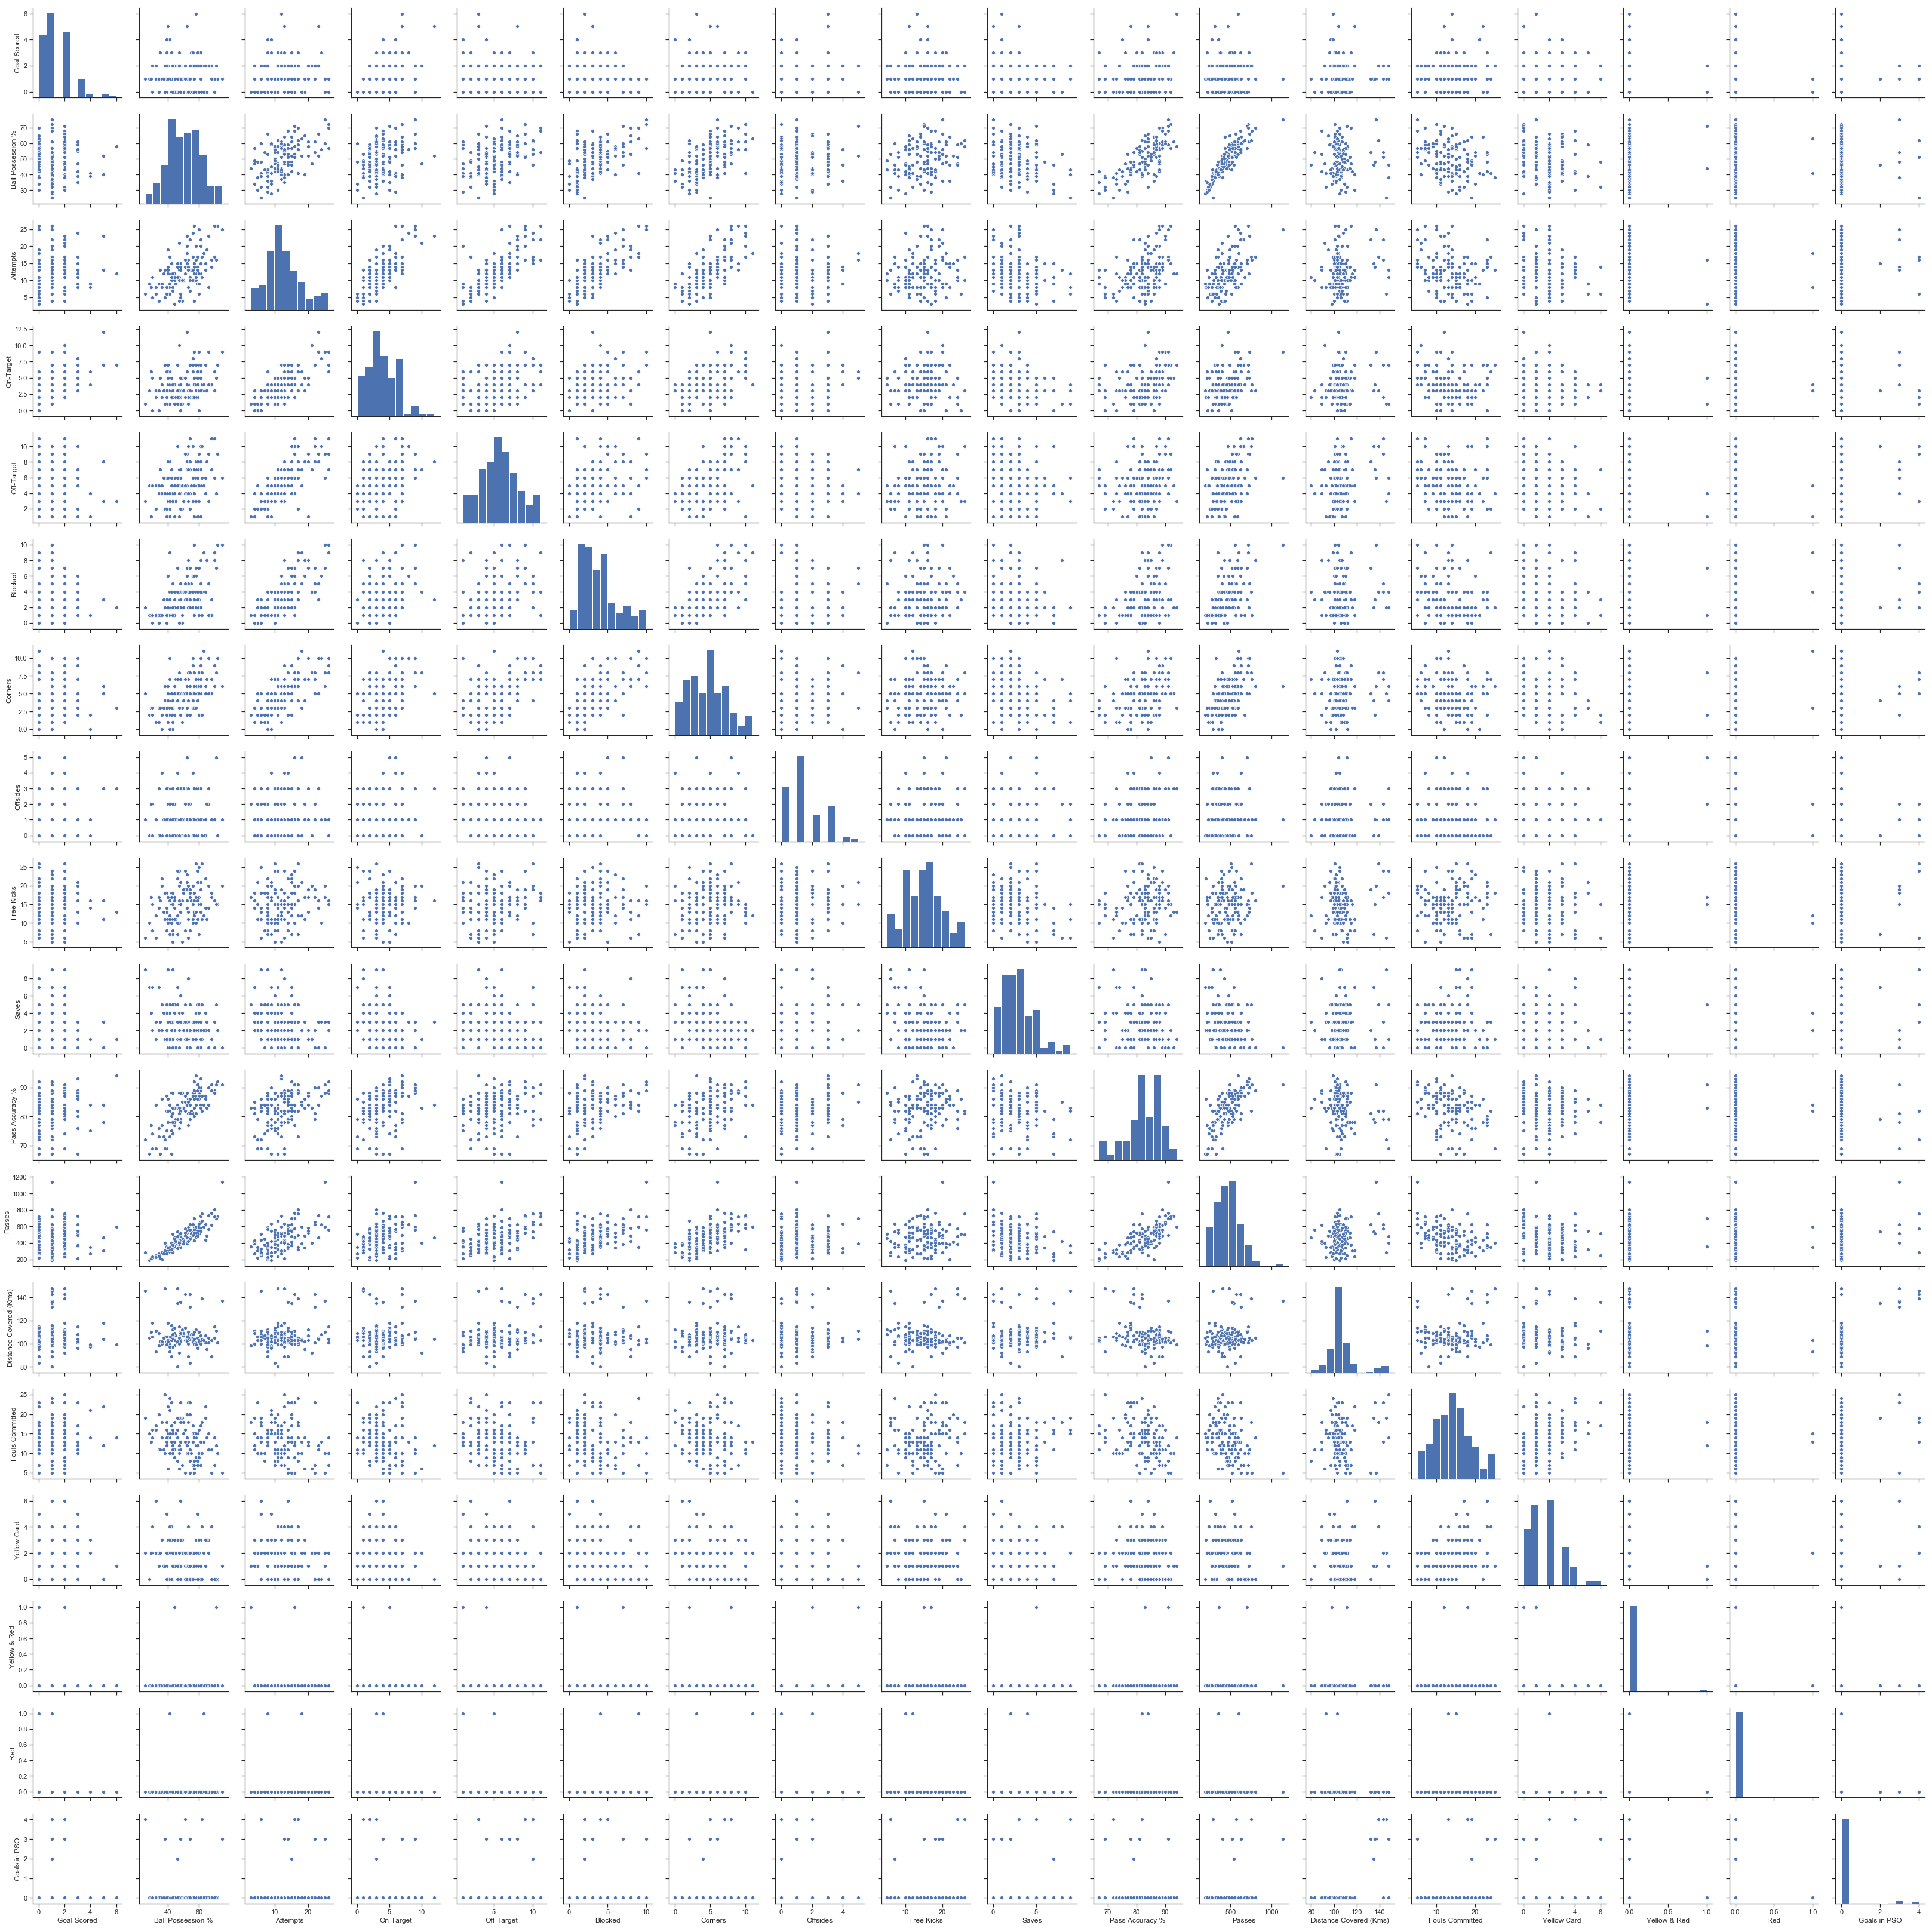

In [42]:
sns.pairplot(data_red)

#### Ящик с усами
----

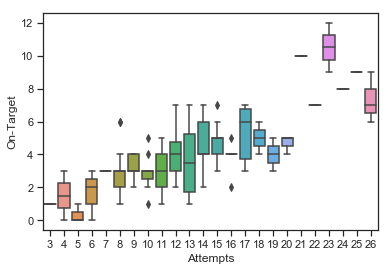

In [43]:
# Распределение параметра On-Target сгруппированные по Attempts.
sns.boxplot(x='Attempts', y='On-Target', data=data_red)

#### Проанализируем корреляцию
-----------

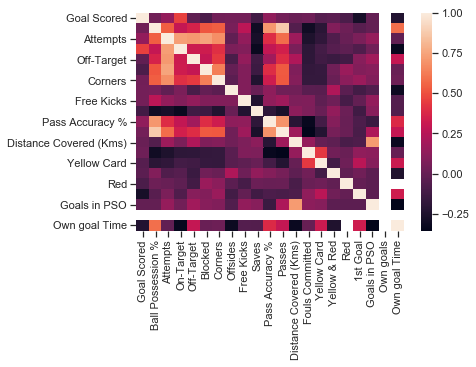

In [44]:
sns.heatmap(data.corr())